In [1]:
# Imports
import time
start_time = time.time()
import json
import random

from tqdm import tqdm
import numpy as np
import pandas as pd
import h5py
from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import optuna

import sys

In [4]:
import optuna
def multi_objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    f1 = (x - 2) ** 2
    f2 = -f1
    return f1, f2

study_name = "example-study"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(directions=['minimize', 'maximize'])
study.optimize(multi_objective, n_trials=10)
# study = optuna.create_study(study_name=study_name, storage=storage_name, directions=['minimize', 'maximize'], load_if_exists=True)
# study.optimize(multi_objective, n_trials=10)


[I 2024-07-17 15:00:13,574] A new study created in memory with name: no-name-84bd79d7-cfe8-49eb-914b-555e77a13975
/tmp/ipykernel_2985490/4003448136.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  x = trial.suggest_uniform('x', -10, 10)
[I 2024-07-17 15:00:13,576] Trial 0 finished with values: [10.565836114701638, -10.565836114701638] and parameters: {'x': 5.250513207895276}. 
[I 2024-07-17 15:00:13,577] Trial 1 finished with values: [27.34321222742025, -27.34321222742025] and parameters: {'x': 7.229073744691334}. 
[I 2024-07-17 15:00:13,577] Trial 2 finished with values: [25.296447701161046, -25.296447701161046] and parameters: {'x': -3.029557406090624}. 
[I 2024-07-17 15:00:13,578] Trial 3 finished with values: [46.00316573130944, -46.00316573130944] and parameters: {'x': 8.782563359918537}. 
[I 2024-07-17 15:00:13,579] Trial 4 finished wit

0
0
0
0
0
0
0
0
8


In [ ]:
print(study.best_trials[0].values)

In [4]:
study = optuna.create_study(study_name=study_name, storage=storage_name, directions=['minimize', 'maximize'], load_if_exists=True)
study.optimize(multi_objective, n_trials=10)

[I 2024-05-20 13:09:09,687] Using an existing study with name 'example-study' instead of creating a new one.
/tmp/ipykernel_2361503/1261574959.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  x = trial.suggest_uniform('x', -10, 10)
[I 2024-05-20 13:09:10,183] Trial 10 finished with values: [29.11189285050006, -29.11189285050006] and parameters: {'x': 7.395543795624317}. 
[I 2024-05-20 13:09:10,545] Trial 11 finished with values: [29.821351722111427, -29.821351722111427] and parameters: {'x': -3.4608929418284173}. 
[I 2024-05-20 13:09:10,870] Trial 12 finished with values: [2.5193422304920543, -2.5193422304920543] and parameters: {'x': 0.4127564048035808}. 
[I 2024-05-20 13:09:11,227] Trial 13 finished with values: [72.99611087087439, -72.99611087087439] and parameters: {'x': -6.543776148218912}. 
[I 2024-05-20 13:09:11,552] Trial 14 finished 

In [26]:
study.best_trials  # E.g. {'x': 2.002108042}

[FrozenTrial(number=4, state=1, values=[0.09692127703874832, -0.09692127703874832], datetime_start=datetime.datetime(2024, 4, 21, 12, 31, 37, 260889), datetime_complete=datetime.datetime(2024, 4, 21, 12, 31, 37, 261076), params={'x': 2.31132182229768}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=4, value=None)]

In [2]:
f = sys.argv[1]
g = sys.argv[2]
print(f)
print(g)

-f
/home/kaad8904/.local/share/jupyter/runtime/kernel-314e8498-23c5-4336-9c14-454f8db6938f.json


In [3]:
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
 
# Storing ID of current CUDA device
# cuda_id = torch.cuda.current_device()
# print(f"ID of current CUDA device: {torch.cuda.current_device()}")
       
# print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system? False
CUDA version: 11.8


# Class definition

In [4]:
class CNN(nn.Module):
    """Regress over image features."""
    def __init__(self):
        super().__init__()
        dr = 0.2
        # self.conv1 = nn.Conv2d(3, 16, 4)
        self.conv1 = nn.Conv2d(1, 16, 4)
        # self.conv1 = nn.Conv2d(2, 16, 4, stride = 2) # stride is new
        self.conv2 = nn.Conv2d(16, 32, 4)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 32, 4)
        self.conv4 = nn.Conv2d(32, 32, 4)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(32, 32, 4) # new
        self.conv6 = nn.Conv2d(32, 32, 4) # new
        self.pool3 = nn.MaxPool2d(2, 2) # new

        # self.fc1 = nn.Linear(32 * 3 * 3, 32) # Originally 27 * 27
        self.fc1 = nn.Linear(32*10*10,32) # originally 3 * 3
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)
        self.dropout = nn.Dropout(p = dr)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool1(x)
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool2(x)
        x = torch.relu(self.conv5(x)) # new
        x = torch.relu(self.conv6(x)) # new
        x = self.pool3(x) # new

        print(x.shape)
        
        x = x.flatten(start_dim = 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
#         x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc3(x)

        return x

### Load Data

Active CASA node: /pl/active/CASA/kaad8904/

In [5]:
# TNG300
Xray_02_04_file = "/projects/beop5934/halos/Groups/Maps_0.2_0.4keV_lem_TNG300_Groups_z=0.00.npy"
Xray_04_06_file = "/projects/beop5934/halos/Groups/Maps_0.4_0.6keV_lem_TNG300_Groups_z=0.00.npy"
Xray_073_11_file = "/projects/beop5934/halos/Groups/Maps_0.73_1.1keV_lem_TNG300_Groups_z=0.00.npy"
Xray_143_20_file = "/projects/beop5934/halos/Groups/Maps_1.43_2.0keV_lem_TNG300_Groups_z=0.00.npy"

Fe_XVII_file = "/projects/beop5934/halos/Groups/Maps_Fe_XVII_TNG300_Groups_z=0.00.npy"
O_VII_file = "/projects/beop5934/halos/Groups/Maps_O_VII_TNG300_Groups_z=0.00.npy"
O_VIII_file = "/projects/beop5934/halos/Groups/Maps_O_VIII_TNG300_Groups_z=0.00.npy"

H1_file = "/pl/active/CASA/beop5934/halos/TNG300/Maps_H_I_coldens_TNG300_z=0.00.npy"
H1_vel_file = "/pl/active/CASA/beop5934/halos/TNG300/Maps_H_I_vel_TNG300_z=0.00.npy"
H1_disp_file = "/pl/active/CASA/beop5934/halos/TNG300/Maps_H_I_disp_TNG300_z=0.00.npy"

#TNG100
Xray_02_04_100_file = "/pl/active/CASA/kaad8904/Maps_0.2_0.4keV_lem_TNG100_z=0.010.1000ksec.npy"
Xray_04_06_100_file = "/pl/active/CASA/kaad8904/Maps_0.4_0.6keV_lem_TNG100_z=0.010.1000ksec.npy"
Xray_073_11_100_file = "/pl/active/CASA/kaad8904/Maps_0.73_1.1keV_lem_TNG100_z=0.010.1000ksec.npy"
Xray_143_20_100_file = "/pl/active/CASA/kaad8904/Maps_1.43_2.0keV_lem_TNG100_z=0.010.1000ksec.npy"

Fe_XVII_100_file = "/pl/active/CASA/kaad8904/Maps_Fe_XVII_TNG100_z=0.010.1000ksec.npy"
O_VII_100_file = "/pl/active/CASA/kaad8904/Maps_O_VII_TNG100_z=0.010.1000ksec.npy"
O_VIII_100_file = "/pl/active/CASA/kaad8904/Maps_O_VIII_TNG100_z=0.010.1000ksec.npy"

H1_100_file = "/pl/active/CASA/beop5934/halos/TNG100/Maps_H_I_coldens_TNG100_z=0.000.npy"
H1_100_vel_file = "/pl/active/CASA/beop5934/halos/TNG100/Maps_H_I_vel_TNG100_z=0.000.npy"
H1_100_disp_file = "/pl/active/CASA/beop5934/halos/TNG100/Maps_H_I_disp_TNG100_z=0.000.npy"

#loading files
# Xray_04_06 = np.load(Xray_04_06_file)
Xray_04_06_100 = np.load(Xray_04_06_100_file)
Fe_XVII_100 = np.load(Fe_XVII_100_file)
O_VII_100 = np.load(O_VII_100_file)
O_VIII_100 = np.load(O_VIII_100_file)
# H1 = np.load(H1_file)
# H1_vel = np.load(H1_vel_file)
H1_100 = np.load(H1_100_file)
H1_100_vel = np.load(H1_100_vel_file)
H1_100_disp = np.load(H1_100_disp_file)
# H1_disp = np.load(H1_disp_file)
# images = Xray_04_06

# Plotting Section

In [6]:
# print(images.shape)
# print(H1.shape)
# # print(H1_vel.shape)
# # print(H1_disp.shape)
# print(H1_100.shape)
# # print(H1_100_vel.shape)
# # print(H1_100_disp.shape)
# plt.imshow(images[0]);
# plt.show();
# plt.imshow(H1[0]);
# plt.colorbar()
# plt.show();
# # plt.imshow(H1_vel[0]);
# # plt.show();
# # plt.imshow(H1_disp[0]);
# # plt.show();
# plt.imshow(H1_100[0]);
# plt.show();
# # plt.imshow(H1_100_vel[0]);
# # plt.show();
# # plt.imshow(H1_100_disp[0]);
# plt.imshow(H1_100[30])
# plt.colorbar()
# plt.show()
# plt.hist(np.log10(H1_100[30]).flatten(),bins = 100)
# plt.yscale('log')
# plt.show()
# plt.imshow(H1_100_vel[30])
# plt.colorbar()
# plt.show()
# plt.hist(H1_100_vel[30].flatten(),bins = 100)
# plt.yscale('log');

In [7]:
Names = ["T:Halo_Mass","T:2","T:3","T:4","T:5","T:6","T:7","T:8","T:9","T:10","T:11","T:12","Id","T:14"]
Dataset_overlord = pd.read_csv("/pl/active/CASA/beop5934/halos/TNG300/Params_Groups_TNG300_z=0.00.ascii_plus_ID", delimiter = "\s+",names = Names)
# Dataset_overlord = Dataset_overlord.append((Dataset_overlord,Dataset_overlord))
# Dataset_overlord = Dataset_overlord.sort_values('Id',ignore_index=True)
ids = Dataset_overlord['Id']
TM500 = Dataset_overlord['T:Halo_Mass']
# Mass_cut = TM500 >= 13.2 # cutting too low mass items
# Dataset_overlord = Dataset_overlord[Mass_cut].reset_index() # cutting
# ids = Dataset_overlord['Id'] # cutting
# TM500 = Dataset_overlord['T:Halo_Mass'] # cutting
# print(len(TM500)) # cutting length
# ids
Dataset_overlord
# TM500

,T:Halo_Mass,T:2,T:3,T:4,T:5,T:6,T:7,T:8,T:9,T:10,T:11,T:12,Id,T:14
0,14.482,0.145,0.787,3.315,0.696,7.722,3.387,7.694,-2.461,0.176,0.274,-0.277,6,0
1,14.470,0.150,0.621,5.909,0.709,1.354,0.774,7.809,-2.414,0.170,0.270,-0.273,8,0
2,14.326,0.148,0.897,3.179,0.607,9.166,3.505,7.544,-2.358,0.126,0.221,-0.275,16,0
3,14.454,0.142,0.587,4.756,0.679,-1.361,1.134,7.723,-2.350,0.150,0.253,-0.268,17,0
4,14.425,0.127,0.687,3.154,0.717,-1.968,2.065,7.745,-2.598,0.156,0.253,-0.277,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,12.905,0.030,0.547,5.784,0.887,1.113,-0.031,6.707,-2.295,-0.021,0.080,-0.279,4744,0
3473,12.881,0.030,0.412,8.150,0.691,0.207,0.587,6.802,-2.559,-0.070,0.014,-0.306,4776,0
3474,12.915,0.038,0.442,9.416,0.702,4.126,2.103,6.805,-2.328,-0.058,0.037,-0.291,4810,0
3475,12.859,0.033,0.620,7.138,0.702,0.601,-0.518,6.666,-2.617,0.084,0.173,-0.300,4857,0


In [8]:
Names_100 = ["T:Halo_Mass","T:2","T:3","T:4","T:5","T:6","T:7","T:8","T:9","T:10","T:11","T:12","Id","T:14"]
Dataset_overlord_100 = pd.read_csv("/pl/active/CASA/beop5934/halos/TNG100/Params_TNG100_z=0.010.ascii", delimiter = "\s+",names = Names_100)
# Dataset_overlord = Dataset_overlord.sort_values('Id',ignore_index=True)
# Dataset_overlord_100["Id"] = Dataset_overlord_100.index
ids_100 = Dataset_overlord_100['Id']
TM200 = Dataset_overlord_100['T:Halo_Mass'] # TNG M200 mass
# Mass_cut = TM500 >= 13.2 # cutting too low mass items
# Dataset_overlord = Dataset_overlord[Mass_cut].reset_index() # cutting
# ids = Dataset_overlord['Id'] # cutting
# TM500 = Dataset_overlord['T:Halo_Mass'] # cutting
# print(len(TM500)) # cutting length
# ids
Dataset_overlord_100

,T:Halo_Mass,T:2,T:3,T:4,T:5,T:6,T:7,T:8,T:9,T:10,T:11,T:12,Id,T:14
0,13.931,0.070,0.845,3.426,0.686,0.207,11.573,7.367,-2.064,0.120,0.243,-0.239,12,0
1,13.712,0.074,0.658,6.991,0.820,0.255,11.744,7.219,-1.937,0.181,0.308,-0.231,13,0
2,13.800,0.082,0.617,5.845,0.709,0.147,11.766,7.295,-2.033,0.136,0.253,-0.255,16,0
3,13.976,0.101,0.740,2.555,0.640,0.136,11.723,7.311,-2.317,0.115,0.222,-0.265,18,0
4,13.975,0.103,0.605,4.817,0.693,0.133,11.725,7.430,-2.180,0.181,0.288,-0.278,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,11.702,0.005,0.253,18.085,0.887,0.014,10.296,6.568,-2.138,-0.075,0.042,-0.256,4280,0
3562,11.712,0.011,0.378,14.223,0.875,0.025,10.159,6.160,-2.136,0.094,0.220,-0.230,4302,0
3563,11.736,0.012,0.255,17.867,0.893,0.015,10.230,6.082,-2.148,-0.119,-0.011,-0.264,4314,0
3564,11.713,0.008,0.275,14.287,0.821,0.015,10.088,6.026,-2.011,-0.155,-0.051,-0.280,4372,0


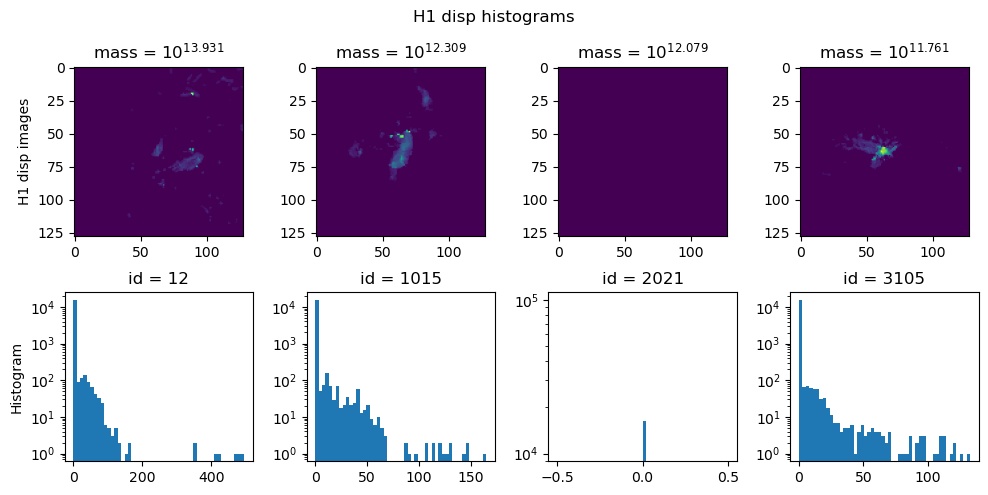

In [29]:
fig, ax = plt.subplots(2,4,figsize=(10,5))
fig.suptitle('H1 disp histograms')

ax[0,0].imshow(H1_100_disp[0])
ax[1,0].hist(H1_100_disp[0].flatten(),bins=50)
ax[1,0].set_yscale('log')
ax[0,0].set_ylabel('H1 disp images')
ax[1,0].set_ylabel('Histogram')
ax[0,0].title.set_text(f'mass = $10^{{{TM200[0]}}}$')
ax[1,0].title.set_text(f'id = {ids_100[0]}')

ax[0,1].imshow(H1_100_disp[3000])
ax[1,1].hist(H1_100_disp[3000].flatten(),bins=50)
ax[1,1].set_yscale('log')
ax[0,1].title.set_text(f'mass = $10^{{{TM200[1000]}}}$')
ax[1,1].title.set_text(f'id = {ids_100[1000]}')

ax[0,2].imshow(H1_100_disp[6000])
ax[1,2].hist(H1_100_disp[6000].flatten(),bins=50)
ax[1,2].set_yscale('log')
ax[0,2].title.set_text(f'mass = $10^{{{TM200[2000]}}}$')
ax[1,2].title.set_text(f'id = {ids_100[2000]}')

ax[0,3].imshow(H1_100_disp[9000])
ax[1,3].hist(H1_100_disp[9000].flatten(),bins=50)
ax[1,3].set_yscale('log')
ax[0,3].title.set_text(f'mass = $10^{{{TM200[3000]}}}$')
ax[1,3].title.set_text(f'id = {ids_100[3000]}')
plt.tight_layout()
plt.savefig("H1_disp_Hist.png")

### Setup

In [9]:
cnn = CNN()
# image = images[0] # read in image data
model = cnn
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-2)
trloss_rec = []
teloss_rec = []

### Training and Testing Dataset setup

In [10]:
#TNG300
images_XYZ = np.reshape(images,(3,3477,128,128),order = 'F')
# # images_XYZ = images_XYZ[:,Mass_cut,:,:] # cutting
# print(images_XYZ.shape)
H1_XYZ = np.reshape(H1,(3,3477,128,128),order = 'F')
print(H1_XYZ.shape)

#TNG100
# images_XYZ = np.reshape(images,(3,3566,128,128),order = 'F')
H1_100_XYZ = np.reshape(H1_100,(3,3566,128,128),order = 'F')
print(images_XYZ.shape)

(3, 3477, 128, 128)
(3, 3477, 128, 128)


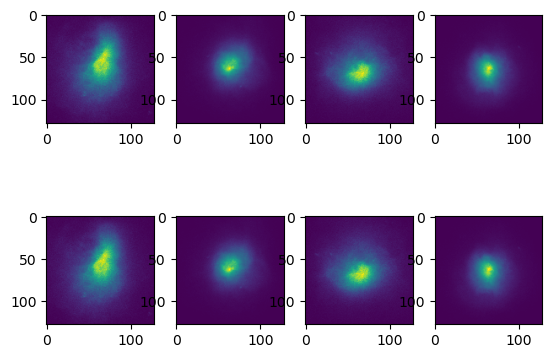

In [11]:
fig, ax = plt.subplots(2,4) # checking that the galaxies are the same in images and imagesXYZ

ax[0,0].imshow(images_XYZ[0,0]) # first two images from reshape
ax[0,1].imshow(images_XYZ[0,1])
ax[1,0].imshow(images[0]) # first two images from non-reshape
ax[1,1].imshow(images[3])
ax[0,2].imshow(images_XYZ[1,0]) # first two images of y
ax[0,3].imshow(images_XYZ[1,1])
ax[1,2].imshow(images[1]) # should be the first two images of y
ax[1,3].imshow(images[4]);

In [16]:
pixel_values = np.array([])
for j in range(3):
    for i in range(len(images_XYZ[j])):
        value = np.mean(images_XYZ[j][i])
        pixel_values = np.append(pixel_values, value)
H1_values = np.array([])
for j in range(3):
    for i in range(len(H1_XYZ[j])):
        value = np.mean(H1_XYZ[j][i])
        H1_values = np.append(H1_values, value)
H1_100_values = np.array([])
for j in range(3):
    for i in range(len(H1_100_XYZ[j])):
        value = np.mean(H1_100_XYZ[j][i])
        H1_100_values = np.append(H1_100_values, value)

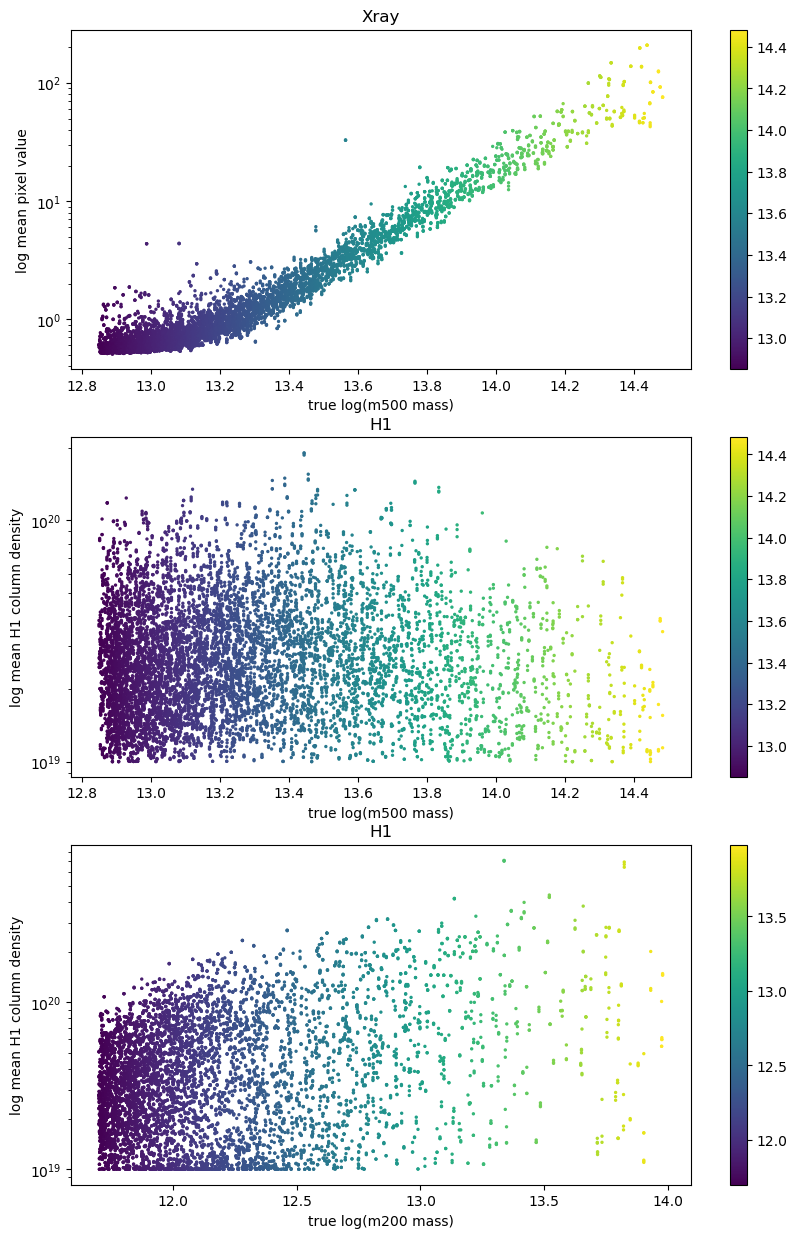

In [17]:
fig, ax = plt.subplots(3,1,figsize = (10,15))
# im = ax[0].scatter(pixel_values,[TM200,TM200,TM200],s = 2,c = [TM200,TM200,TM200])
im = ax[0].scatter([TM500,TM500,TM500],pixel_values,s=2,c=[TM500,TM500,TM500])
ax[0].set_xlabel('true log(m500 mass)')
ax[0].set_ylabel('log mean pixel value')
# ax[0].set_xlim([2e1,1e2])
# ax[0].set_ylim([14.2,14.4])
ax[0].set_yscale('log')
ax[0].title.set_text('Xray')
fig.colorbar(im);
im2 = ax[1].scatter([TM500,TM500,TM500],H1_values,s=2,c = [TM500,TM500,TM500])
ax[1].set_xlabel('true log(m500 mass)')
ax[1].set_ylabel('log mean H1 column density')
ax[1].set_yscale('log')
ax[1].title.set_text('H1')
fig.colorbar(im2);
im3 = ax[2].scatter([TM200,TM200,TM200],H1_100_values,s=2,c = [TM200,TM200,TM200])
ax[2].set_xlabel('true log(m200 mass)')
ax[2].set_ylabel('log mean H1 column density')
ax[2].set_yscale('log')
ax[2].title.set_text('H1')
fig.colorbar(im3);

In [ ]:
# tm500 = np.array(TM500)
# low_mask = np.where(tm500 > 13.05)
# mid_low_mask = np.where(tm500 > 13.5)
# mid_mask = np.where(tm500 > 14.0)
# high_mask = np.where(tm500 > 14.4)

tm200 = np.array(TM200)
low_mask = np.where(tm200 > 12.5)
mid_low_mask = np.where(tm200 > 13.05)
mid_mask = np.where(tm200 > 13.5)
high_mask = np.where(tm200 > 13.8)

low = low_mask[0][-1]
mid_low = mid_low_mask[0][-1]
mid = mid_mask[0][-1]
high = high_mask[0][-1]

# fig, ax = plt.subplots(2,4, figsize = (10,5))
# im00 = ax[0,0].imshow(images_XYZ[0][low],vmin = np.percentile(images_XYZ[0][low],1), vmax = np.percentile(images_XYZ[0][low],99)) # top row, xray images
# ax[0,0].set_ylabel('Xray images')
# ax[0,0].title.set_text(f'mass = 10^{tm500[low]}')
# fig.colorbar(im00,orientation = "horizontal")
# im01 = ax[0,1].imshow(images_XYZ[0][mid_low],vmin = np.percentile(images_XYZ[0][mid_low],1), vmax = np.percentile(images_XYZ[0][mid_low],99))
# ax[0,1].title.set_text(f'mass = 10^{tm500[mid_low]}')
# fig.colorbar(im01,orientation = "horizontal")
# im02 = ax[0,2].imshow(images_XYZ[0][mid],vmin = np.percentile(images_XYZ[0][mid],1), vmax = np.percentile(images_XYZ[0][mid],99))
# ax[0,2].title.set_text(f'mass = 10^{tm500[mid]}')
# fig.colorbar(im02,orientation = "horizontal")
# im03 = ax[0,3].imshow(images_XYZ[0][high],vmin = np.percentile(images_XYZ[0][high],1), vmax = np.percentile(images_XYZ[0][high],99))
# ax[0,3].title.set_text(f'mass = 10^{tm500[high]}')
# fig.colorbar(im03,orientation = "horizontal")

fig, ax = plt.subplots(2,4, figsize = (10,5))
im00 = ax[0,0].imshow(images_XYZ[0][low],vmin = np.percentile(images_XYZ[0][low],1), vmax = np.percentile(images_XYZ[0][low],99)) # top row, xray images
ax[0,0].set_ylabel('Xray images')
ax[0,0].title.set_text(f'mass = 10^{tm200[low]}')
fig.colorbar(im00,orientation = "horizontal")
im01 = ax[0,1].imshow(images_XYZ[0][mid_low],vmin = np.percentile(images_XYZ[0][mid_low],1), vmax = np.percentile(images_XYZ[0][mid_low],99))
ax[0,1].title.set_text(f'mass = 10^{tm200[mid_low]}')
fig.colorbar(im01,orientation = "horizontal")
im02 = ax[0,2].imshow(images_XYZ[0][mid],vmin = np.percentile(images_XYZ[0][mid],1), vmax = np.percentile(images_XYZ[0][mid],99))
ax[0,2].title.set_text(f'mass = 10^{tm200[mid]}')
fig.colorbar(im02,orientation = "horizontal")
im03 = ax[0,3].imshow(images_XYZ[0][high],vmin = np.percentile(images_XYZ[0][high],1), vmax = np.percentile(images_XYZ[0][high],99))
ax[0,3].title.set_text(f'mass = 10^{tm200[high]}')
fig.colorbar(im03,orientation = "horizontal")

# im10 = ax[1,0].imshow(H1_XYZ[0][low].T,vmin = np.percentile(H1_XYZ[0][low],1),vmax = np.percentile(H1_XYZ[0][low],99)) # bottom row, H1 images
# ax[1,0].set_ylabel('H1 images')
# fig.colorbar(im10,orientation = "horizontal")
# im11 = ax[1,1].imshow(H1_XYZ[0][mid_low].T,vmin = np.percentile(H1_XYZ[0][mid_low],1),vmax = np.percentile(H1_XYZ[0][mid_low],99))
# fig.colorbar(im11,orientation = "horizontal")
# im12 = ax[1,2].imshow(H1_XYZ[0][mid].T,vmin = np.percentile(H1_XYZ[0][mid],1),vmax = np.percentile(H1_XYZ[0][mid],99))
# fig.colorbar(im12,orientation = "horizontal")
# im13 = ax[1,3].imshow(H1_XYZ[0][high].T,vmin = np.percentile(H1_XYZ[0][high],1),vmax = np.percentile(H1_XYZ[0][high],99))
# fig.colorbar(im13,orientation = "horizontal")
# fig.suptitle('Xray versus H1')
# plt.tight_layout()

im10 = ax[1,0].imshow(H1_100_XYZ[0][low],vmin = np.percentile(H1_100_XYZ[0][low],1), vmax = np.percentile(H1_100_XYZ[0][low],99)) # bottom row, H1 images
ax[1,0].set_ylabel('H1 images')
fig.colorbar(im10,orientation = "horizontal")
im11 = ax[1,1].imshow(H1_100_XYZ[0][mid_low],vmin = np.percentile(H1_100_XYZ[0][mid_low],1), vmax = np.percentile(H1_100_XYZ[0][mid_low],99))
fig.colorbar(im11,orientation = "horizontal")
im12 = ax[1,2].imshow(H1_100_XYZ[0][mid],vmin = np.percentile(H1_100_XYZ[0][mid],1), vmax = np.percentile(H1_100_XYZ[0][mid],99))
fig.colorbar(im12,orientation = "horizontal")
im13 = ax[1,3].imshow(H1_100_XYZ[0][high],vmin = np.percentile(H1_100_XYZ[0][high],1), vmax = np.percentile(H1_100_XYZ[0][high],99))
fig.colorbar(im13,orientation = "horizontal")
fig.suptitle('Xray versus H1')
plt.tight_layout()

In [23]:
# rand_start = np.arange(images_XYZ[0].shape[0]) // 3 channel split
rand_start = np.arange(images.shape[0]) # flattened
print('Starting array = ',rand_start)
# np.random.seed(125431)
# torch.manual_seed(571753)
np.random.shuffle(rand_start)
print('Shuffled array = ',rand_start)

Starting array =  [    0     1     2 ... 10428 10429 10430]
Shuffled array =  [ 4392  1382  1894 ... 10241  8613  7304]


In [69]:
# split_train = int(images_XYZ[0].shape[0]*0.8)
# split_test = images_XYZ[0].shape[0]-split_train
split_train = int(images.shape[0]*0.8)
split_test = images.shape[0]-split_train
print(f"training split looks like {split_train} galaxies \ntesting split looks like {split_test} galaxies")
train_indeces = rand_start[:split_train]
test_indeces = rand_start[split_train:]
print("Training indeces = ",train_indeces,"\nTesting indeces = ",test_indeces)
print(f"Shape of train = {train_indeces.shape}\nShape of test = {test_indeces.shape}")

training split looks like 8558 galaxies 
testing split looks like 2140 galaxies
Training indeces =  [9226 8791 4779 ... 2884 2395 6063] 
Testing indeces =  [3504 3258 5539 ... 6179 7495  815]
Shape of train = (8558,)
Shape of test = (2140,)


### Setting data class file

images_XYZ = H1_XYZ  
#print(images_XYZ.shape)

In [70]:
x = H1_100
for i in range(x.shape[0]):
    x[i] = x[i]/np.min(x[i])
x.shape

(10698, 128, 128)

In [71]:
# images = np.array([np.log10(H1),x])
# images = np.log10(H1)

### Flattening

In [72]:
#TNG300
DO_new = pd.DataFrame(np.repeat(Dataset_overlord.values,3,axis=0))
DO_new.columns = Dataset_overlord.columns
TM500 = DO_new['T:Halo_Mass']
ids = DO_new['Id']
ids_new = []
DO_new
for i in range(0,len(TM500),3):
    ids_new.append(f"{int(ids[i])}_x")
    ids_new.append(f"{int(ids[i])}_y")
    ids_new.append(f"{int(ids[i])}_z")
ids = ids_new
# ids

In [73]:
#TNG100
DO_100_new = pd.DataFrame(np.repeat(Dataset_overlord_100.values,3,axis=0))
DO_100_new.columns = Dataset_overlord_100.columns
TM200 = DO_100_new['T:Halo_Mass']
ids_100 = DO_100_new['Id']
ids_100_new = []
DO_100_new
for i in range(0,len(TM200),3):
    ids_100_new.append(f"{int(ids_100[i])}_x")
    ids_100_new.append(f"{int(ids_100[i])}_y")
    ids_100_new.append(f"{int(ids_100[i])}_z")
ids_100 = ids_100_new

In [74]:
# DO_new['Id'] = ids
# DO_new = DO_new.sort_values(by='Id')
# DO_new.reset_index(drop = True)
# values = np.array([])
# for i in range(len(DO_new['Id'])):
#     values = np.append(values, Deepsets['T:Halo_Mass'][i]-DO_new['T:Halo_Mass'][i]
# np.where(values != 0)

In [75]:
print(images.shape)
print(TM200.shape)
print(len(ids_100))

(10698, 128, 128)
(10698,)
10698


In [76]:
merged_x = {}
#TNG300
# for i in range(images_XYZ[0].shape[0]): # 1D CNN
#     merged_x[ids[i]] = torch.FloatTensor(
#         images_XYZ[0][i]
#     ).unsqueeze(0)
# for i in range(images_XYZ[0].shape[0]): #  3D CNN
#     merged_x[ids[i]] = torch.FloatTensor(
#         images_XYZ[:,i]
#     )
# for i in range(images.shape[1]): # 2D Flattened
#     merged_x[ids[i]] = torch.FloatTensor(
#         images[:,i]
#     )
# for i in range(images.shape[0]): # Flattened
#     merged_x[ids[i]] = torch.FloatTensor(
#         images[i]
#     ).unsqueeze(0)
# merged_y = dict( # flattned
#     zip(
#         ids,
#         TM500.apply(
#             lambda x: torch.FloatTensor([x])
#         ),
#     )
# )

#TNG100
for i in range(images.shape[0]): # Flattened
    merged_x[ids_100[i]] = torch.FloatTensor(
        images[i]
    ).unsqueeze(0)
merged_y = dict( # flattned
    zip(
        ids_100,
        TM200.apply(
            lambda x: torch.FloatTensor([x])
        ),
    )
)

print(len(merged_x))
print(len(merged_y))
print(merged_x["6_x"].shape)

10698
10698
torch.Size([1, 128, 128])


In [77]:
class CNN_Clusters(Dataset):
    def __init__(self,x,y,clusters_id):
        self.cluster_ids = clusters_id
        self.total_samples = len(self.cluster_ids)
        self.x = x
        self.y = y
        
    def __len__(self) -> int:
        return self.total_samples
    
    def __getitem__(self, idx: int):
        cluster_id = self.cluster_ids[idx]
        x = self.x[cluster_id]
        y = self.y[cluster_id]
        return x, y, x.shape[0], cluster_id

def collate_fn(batch):
    x, y, sizes, batch_ids = zip(*batch)
    x_batched = torch.stack(x)
    y_batched = torch.concat(y)
    return x_batched, y_batched, sizes, batch_ids

In [78]:
#TNG300
# clid_train = np.array([],dtype = np.int64) # integer ids, 
# clid_test = np.array([],dtype = np.int64)
# clid_train = [] # flattened string cluster ids
# clid_test = []
# # for i in train_indeces: clid_train = np.append(clid_train, ids[i])
# # for i in test_indeces: clid_test = np.append(clid_test, ids[i])
# for i in train_indeces: clid_train.append(ids[i])
# for i in test_indeces: clid_test.append(ids[i])
# # print(clid_train)
# print(clid_train[0])
# print(len(clid_train))
# # print(clid_test)
# print(clid_test[0])
# print(len(clid_test))
# # print(ids)
# print(ids[0])
# print(len(ids))

#TNG100
clid_train = [] # flattened string cluster ids
clid_test = []
# for i in train_indeces: clid_train = np.append(clid_train, ids[i])
# for i in test_indeces: clid_test = np.append(clid_test, ids[i])
for i in train_indeces: clid_train.append(ids_100[i])
for i in test_indeces: clid_test.append(ids_100[i])
# print(clid_train)
print(clid_train[0])
print(len(clid_train))
# print(clid_test)
print(clid_test[0])
print(len(clid_test))
# print(ids)
print(ids_100[0])
print(len(ids_100))

3075_y
8558
1168_x
2140
0_x
10698


In [79]:
def build_loader(clids, **kwargs):
    #filtered_clids = [cid for cid in clids if cid in mask]
    dataset = CNN_Clusters(merged_x, merged_y,clids)
    loader = DataLoader(dataset, batch_size=64, collate_fn=collate_fn,
                        **kwargs)
    return loader

train_loader = build_loader(clid_train, shuffle=False)

test_loader = build_loader(clid_test, shuffle=False)

all_loader = build_loader(ids, shuffle = False)
print(train_loader.batch_size)
print(train_loader.dataset[0][0].shape)

64
torch.Size([1, 128, 128])


### Training Epochs

In [80]:
Ntrain = split_train
Ntest = split_test
minimum = np.min(TM200) # the minimum of the entire halo mass array
maximum = np.max(TM200) # the maximum of the entire truth halo mass array

# TODO
def train_epoch(criterion):
    trloss = 0
    pred_array = []
    x_array = []
    y_array = []
#     print(train_loader.dataset[0][0].shape)
    for x, y, sizes, ids in tqdm(train_loader, disable=not verbose):
#         x_array.append(x)
#         y_array.append(y)
        model.train()
#         print(x.shape)
        optimizer.zero_grad()
        pred = model.forward(x)
#         pred_array.append(pred)
        minimum = torch.min(y)
        maximum = torch.max(y)
        y = (y-minimum)/(maximum-minimum)
        loss = criterion(pred, y) 
#         print(f'pred = {pred[:,0][0]}, y = {y[0]}')
        loss.backward()
        optimizer.step()

        trloss += loss.detach().flatten().numpy()[0]
#     print(pred_array,x_array,y_array,'\n')
    teloss = 0
    with torch.no_grad():
        for x, y, sizes, ids in tqdm(test_loader, disable=not verbose):
            model.eval()
            pred = model.forward(x)
            y = (y-minimum)/(maximum-minimum)
            loss = criterion(pred, y)
#             print(pred.shape)
            teloss += loss.detach().flatten().numpy()[0]
            
    trloss /= Ntrain
    teloss /= Ntest
    trloss_rec.append(trloss)
    teloss_rec.append(teloss)
    print(f"epoch: {i+1}/{N_epochs}; train loss: {trloss:.3f}; test loss: {teloss:.3f}")


In [81]:
# train for 60 epochs!
N_epochs = 10
verbose=False

print('Pretraining with vanilla MSE loss...')
def criterion1(pred, y):
    return F.mse_loss(pred[:,0], y, reduction="sum")
for i in range(N_epochs):
    train_epoch(criterion1)
#     if((i % 20) == 0):
#         ys = []
#         preds = []
#         ids = []
#         with torch.no_grad():
#             for x, y, sizes, ide in tqdm(all_loader):
#                 model.eval()
#                 x = x.unsqueeze(1)
#                 pred = model.forward(x)
#                 ys.append(y)
#                 preds.append(pred)
#                 ids.append(ide)
#         ys = np.concatenate(ys)
#         preds = np.concatenate(preds)
#         ids = np.concatenate(ids)
#         f, ax = plt.subplots()
#         ax.plot([11,16],[11,16],'k--')
#         sns.histplot(          # for plotting density map
#             x=ys, y=preds[:,0],
#             ax=ax,
#             cbar=True,
#         )
#         # ax.errorbar(ys,preds[:,0],yerr = np.exp(preds[:,1]), fmt = '.', alpha = 0.1, color = "Green") # Gaussian PDF
#         ax.errorbar(ys,preds[:,0],yerr = np.sqrt(preds[:,1]), fmt = '.', alpha = 0.1, color = "Green") # Moment network
#         ax.set_xlim(11.5,15)
#         ax.set_ylim(11.5,15)
#         ax.set_title('CNN')
#         ax.set_xlabel('log_Mtrue')
#         ax.set_ylabel('log_Mpred')
#         plt.show()
#         f.tight_layout()
#         f.savefig(f"/CNN_Light_Mid_Epochs/CNN_Light_Mid_{i+1}_epoch.png");

patience = 20
wait = 0
valoss_min = np.inf
Pretrain_epochs = N_epochs
min_change = 1e-3

soft = 1e-5
N_epochs = 200
print('\nTraining to maximize Gaussian logpdf...')
def criterion2(pred, y):
    return -(-pred[:,1] - ((y-(pred[:,0]))/(torch.exp(pred[:,1])+soft))**2/2).sum()
#     return -(-pred[:,1] - ((y-(pred[:,0]))/(torch.exp(pred[:,1])))**2/2).sum()
for i in range(N_epochs):
    train_epoch(criterion2)
    if(teloss_rec[Pretrain_epochs + i] < valoss_min*(1-min_change)):
        wait = 0
        valoss_min = teloss_rec[Pretrain_epochs+i]
        best_model_weights = model.state_dict()
    else:
        wait +=1
    if wait > patience:
        break

Pretraining with vanilla MSE loss...
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])
torch.Size([64, 32, 10, 10])


KeyboardInterrupt: 

Log density Probability Function

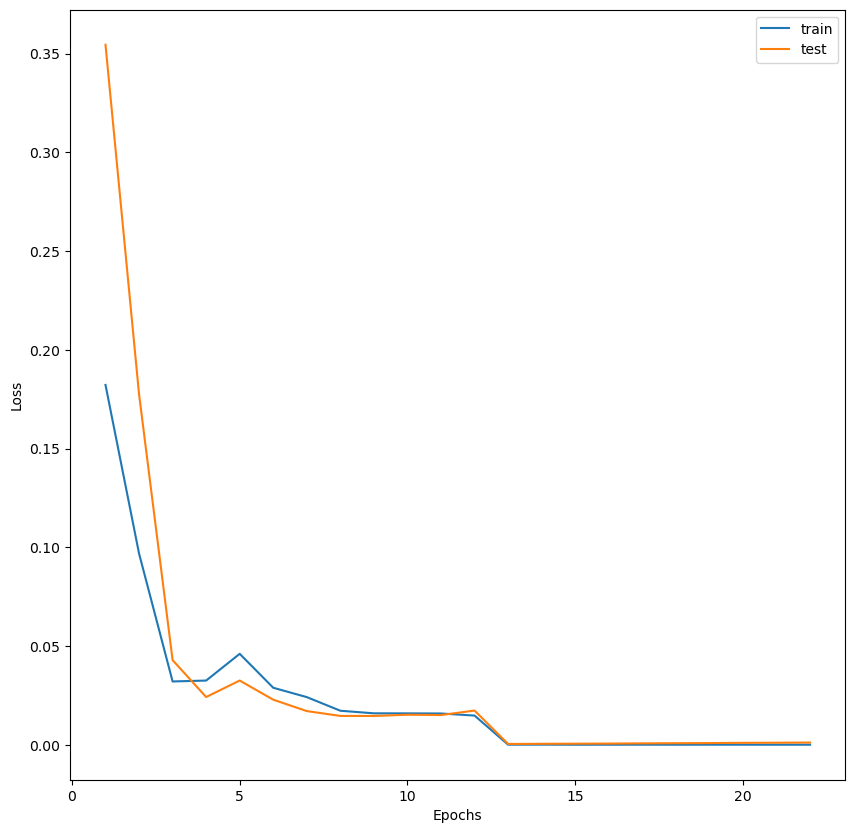

In [66]:
plt.figure(figsize=(10,10),facecolor=(1,1,1))
plt.plot(1+np.arange(len(trloss_rec)), trloss_rec, label='train')
plt.plot(1+np.arange(len(teloss_rec)), teloss_rec, label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();
# plt.savefig("CNN_Light_TR_T_Loss")

In [83]:
ys = []
preds = []
ids = []
with torch.no_grad():
    for x, y, sizes, ide in tqdm(all_loader):
        model.eval()
        pred = model.forward(x)
        ys.append(y)
        pred[:,0] = pred[:,0]*(maximum-minimum) + minimum
#         pred[:,1] += 2*np.log(maximum - minimum) # gaussian
        pred[:,1] *= (maximum - minimum)**2 # moment
        preds.append(pred)
        ids.append(ide)
ys = np.concatenate(ys)
preds = np.concatenate(preds)
ids = np.concatenate(ids)

100%|██████████| 163/163 [00:23<00:00,  7.03it/s]


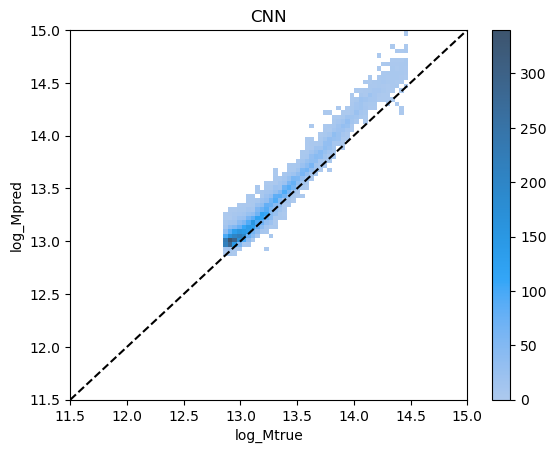

In [84]:
f, ax = plt.subplots()
ax.plot([11,16],[11,16],'k--')
sns.histplot(
    x=ys, y=preds[:,0],
    ax=ax,
    cbar=True,
)
ax.set_xlim(11.5,15)
ax.set_ylim(11.5,15)
ax.set_title('CNN')
ax.set_xlabel('log_Mtrue')
ax.set_ylabel('log_Mpred')
plt.show()
f.tight_layout()
# f.savefig("CNN_Light_TvP.png");

In [ ]:
data_output = open("CNN_Light_Data.txt",'w')
data_output.write("Pred\tError\tTruth")
for i in range(len(preds[:,0])):
    data_output.write(f"{preds[i,0]:.3f}\t{preds[i,1]:.3f}\t{ys[i]:.3f}")
data_output.close()

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))